# 5MT Final - Minkyung Kim (Monica)
### About the project
This was a final project for Programming with Python course (Fall 2019) at the University of Pittsburgh, Katz Graduate School of Business. As a newbie Python learner with 3months of studying python, this was my first data analysis project and it was challenging. I incorporated many code snippets provided by my professor but the project purpose and the analysis was entirely done by myself. Looking back, I can see many errors in the analysis and code but also it shows that I have learned and grown so much for the past year.<br>If you have any questions regarding the project and final presentation, please send me an email (monicakim@pitt.edu)
### Is There a Happiness Formula?

Regardless of its glorious growth, global status, and GDP, South Korea has been one of the top countries with the highest suicide rate. What is even more serious is that suicide is the number one reason for death among South Koreans who are in their 10s, 20s, 30s. Every few weeks or so, we can hear news about celebrities committing suicide, no matter how they looked great on TV. I am very saddened about this fact and worried about the mental health of the people of my home country. 
<br>As I was browsing the data, 'happiness' variable caught my eye and decided to take this opportunity to find some suggestions to lower the suicide rate of South Korea.
<br>With the assumptions of 'South Korea has rather low happiness score' and 'higher happiness score will lower suicide rate', I would like to find out happiness scores among countries, find the top countries with the highest happiness scores, and find out a happiness formula. The happiness formula will be helpful for the South Korea government and society for improving overall happiness and hopefully lowering the suicide rate.

### 1. Preparing the Data
Firstly, I picked out 23 variables including country names to browse. The variables were about job opportunities, health, financial situation, government satisfaction, and some demographic variables. The dependent variable(Y) is 'V10'(Feeling of Happiness).
<br>After selecting variables, I started cleaning up the data by dropping the missing values, and converting text answers in to numeric answers. Data with minus value or no answer, etc was converted to 0. New variables were created as 'Variable'+'a' to keep the original data. The dependent variable(Y) has changed from 'V10' to 'V10a'.

In [1]:
import warnings
warnings.simplefilter(action='ignore');
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

dfraw = pd.read_csv('worldvalues-data.csv', low_memory=False)
dfraw2 = dfraw[['V2','V10','V242','V11','V23','V55','V57','V59','V102','V103','V104','V141','V143', 'V160D','V213','V214','V229','V231','V232','V233','V240','V248','MN_233A']]
dfmissing = dfraw2.isnull().sum().to_frame('missingvalues').reset_index()
print('List of Indexes Missing Values')
print(dfmissing.loc[dfmissing['missingvalues'] != 0])

List of Indexes Missing Values
   index  missingvalues
21  V248              1


In [2]:
df = dfraw2.dropna()

In [3]:
V10 = {'1':1 ,'2' :2, '3':3, '4':4, '-5':0, '-4':0,'-3':0,'-2':0, '-1':0,'Very happy':1, 'Rather happy':2, 'Not very happy':3, 'Not at all happy':4, 'HT: Missing-Dropped out survey; RU: Inappropriate response{Inappropriate}': 0, 'Not asked in survey':0, 'Not applicable':0,'No answer':0,'Dont know':0}
df['V10a'] = df['V10'].map(V10)
V57 = {'1':1 ,'2' :2, '3':3, '4':4, '-5':0, '-4':0,'-3':0,'-2':0, '-1':0,'Married':1, 'Living together as married':2, 'Divorced':3, 'Separated':4, 'Widowed':5, 'Single':6, 'BH:Missing;HT:Missing-Dropped out survey; RU:Inappropriate response{Inappropriate}': 0, 'Not asked in survey':0, 'Not applicable':0,'No answer':0,'Dont know':0}
df['V57a'] = df['V57'].map(V57)
V11 = {'1':1 ,'2' :2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9,'-5':0, '-4':0,'-3':0,'-2':0, '-1':0,'Very good':1, 'Good':2, 'Fair':3, 'Poor':4, 'BH:Missing;HT:Missing-Dropped out survey; RU:Inappropriate response{Inappropriate}': 0, 'Not asked in survey':0, 'Not applicable':0,'No answer':0,'Dont know':0}
df['V11a'] = df['V11'].map(V11)
V23 = {'1':1 ,'2' :2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9,'10':10, '-5':0, '-4':0,'-3':0,'-2':0, '-1':0,'Completely dissatisfied':1, '2' :2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9, 'Completely satisfied':10, 'HT: Dropped out survey;RU:Inappropriate response': 0, 'Not asked in survey':0, 'Not applicable':0,'No answer; BH: Refused':0,'Dont know':0}
df['V23a'] = df['V23'].map(V23)
V55 = {'1':1 ,'2' :2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9, '10':10, '-5':0, '-4':0,'-3':0,'-2':0, '-1':0,'No choice at all':1, '2' :2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9, 'A great deal of choice':10,' HT: Dropped out survey;SG: Missing; DE:Inapplicable; RU: Inappropriate response': 0, 'Not asked in survey':0, 'Not applicable':0,'No answer':0,'Dont know':0}
df['V55a'] = df['V55'].map(V55)
V59 = {'1':1 ,'2' :2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9,'10':10, '-5':0, '-4':0,'-3':0,'-2':0, '-1':0,'Completely dissatisfied':1, '2' :2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9, 'Completely satisfied':10, 'HT: Dropped out survey;DE,SE:Inapplicable ; RU:Inappropriate response': 0, 'Not asked in survey':0, 'Not applicable':0,'No answer; BH: Refused':0,'Dont know':0}
df['V59a'] = df['V59'].map(V59)
V102 = {'1':1 ,'2' :2, '3':3, '4':4,'Trust completely':1, 'Trust somewhat':2, 'Do not trust very much':3, 'Do not trust at all':4, 'DE,SE:Inapplicable ; RU:Inappropriate response; HT: Dropped out survey{Inappropriate}': 0, 'Not asked in survey':0, 'Not applicable':0,'No answer':0,'Dont know':0}
df['V102a'] = df['V102'].map(V102)
V103 = {'1':1 ,'2' :2, '3':3, '4':4,'Trust completely':1, 'Trust somewhat':2, 'Do not trust very much':3, 'Do not trust at all':4,'SE:Inapplicable ; RU:Inappropriate response; HT: Dropped out survey{Inappropriate}': 0, 'Not asked in survey':0, 'Not applicable':0,'No answer':0,'Dont know':0}
df['V103a'] = df['V103'].map(V103)
V104 = {'1':1 ,'2' :2, '3':3, '4':4,'Trust completely':1, 'Trust somewhat':2, 'Do not trust very much':3, 'Do not trust at all':4,'SE:Inapplicable ; RU:Inappropriate response; HT: Dropped out survey{Inappropriate}': 0, 'Not asked in survey':0, 'Not applicable':0,'No answer':0,'Dont know':0}
df['V104a'] = df['V104'].map(V104)
V141 = {'1':1 ,'2' :2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9,'10':10, '-5':0, '-4':0,'-3':0,'-2':0, '-1':0,'Not at all democratic':1,'Completely democratic':10, 'HT: Dropped out survey; RU,DE: Inappropriate response': 0, 'Not asked in survey':0, 'Not applicable':0,'No answer':0,'Dont know':0}
df['V141a'] = df['V141'].map(V141)
V143 = {'1':1 ,'2' :2, '3':3, '4':4, 'SE:Inapplicable ; RU:Inappropriate response; BH: HT: Dropped out survey{Inappropriate}': 0, 'Not asked in survey':0, 'Not applicable':0,'No answer':0,'Dont know':0}
df['V143a'] = df['V143'].map(V143)
V160D = {'1':1 ,'2' :2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9,'-5':0, '-4':0,'-3':0,'-2':0, '-1':0,'Disagree strongly':1, 'Disagree a little':2, 'Neither agree nor disagree':3, 'Agree a little' :4, 'Agree Strongly':5, 'HT: Dropped out survey; Unknown': 0, 'Not asked in survey':0, 'Not applicable':0,'No answer':0,'Dont know':0}
df['V160Da'] = df['V160D'].map(V160D)
V213 = {'1':1 ,'2' :2, '3':3, '4':4,'DE,SE:Inapplicable ; RU:Inappropriate response; HT: Dropped out survey{Inappropriate}' : 0, 'Not asked in survey':0, 'Not applicable':0,'No answer':0,'Dont know':0}
df['V213a'] = df['V213'].map(V213)
V214 = {'1':1 ,'2' :2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9,'-5':0, '-4':0,'-3':0,'-2':0, '-1':0,'Strongly agree':1, 'Agree':2, 'Disagree':3, 'Strongly disagree':4, "DE,SE:Inapplicable ; RU:Inappropriate response; HT: Dropped out survey{Inappropriate}" : 0, 'Not asked in survey':0, 'Not applicable':0,'No answer':0,'Dont know':0}
df['V214a'] = df['V214'].map(V214)
V229 = {'1':1 ,'2' :2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9,'-5':0, '-4':0,'-3':0,'-2':0, '-1':0,'Full time':1, 'Part time':2, 'Self employed':3, 'Retired':4, 'Housewife':5, 'Students':6, 'Unemployed':7, 'Other':8, 'HT: Dropped out survey; RU: Inappropriate response': 0, 'Not asked in survey':0, 'Not applicable':0,'No answer;SG: Refused':0,'Dont know':0}
df['V229a'] = df['V229'].map(V229)
V231 = {'1':1 ,'2' :2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9,'10':10, '-5':0, '-4':0,'-3':0,'-2':0, '-1':0,'Mostly manual tasks':1, 'Mostly non-manual tasks':10, 'BH: Missing;HT: Dropped out survey; RU: Inappropriate response': 0, 'Not asked in survey':0, "Not applicable (Have never worked;Non active persons)":0,'No answer':0,'Dont know':0}
df['V231a'] = df['V231'].map(V231)
V232 = {'1':1 ,'2' :2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9,'10':10, '-5':0, '-4':0,'-3':0,'-2':0, '-1':0,'Mostly routine tasks':1, 'Mostly not routine tasks':10, 'HT: Dropped out survey; RU: Inappropriate response': 0, 'Not asked in survey':0, "Not applicable (Have never worked;Non active persons)":0,'No answer':0,'Dont know':0}
df['V232a'] = df['V232'].map(V232)
V233 = {'1':1 ,'2' :2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9,'10':10, '-5':0, '-4':0,'-3':0,'-2':0, '-1':0,'No independence at all':1, 'Complete independence':10, 'BH: Missing; HT: Dropped out survey; RU: Inappropriate response': 0, 'Not asked in survey':0, "Not applicable (Have never worked)":0,'No answer':0,'Dont know':0}
df['V233a'] = df['V233'].map(V233)
V240 = {'1':1 ,'2' :2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9,'-5':0, '-4':0,'-3':0,'-2':0, '-1':0,'Male':1, 'Female':2, 'Missing; Unknown': 0, 'Not asked in survey':0, 'Not applicable':0,'No answer':0,'Dont know':0}
df['V240a'] = df['V240'].map(V240)
V248 = {'1':1 ,'2' :2, '3':3, '4':4, '5':5, '6':6, '7':7, '8':8, '9':9,'-5':0, '-4':0,'-3':0,'-2':0, '-1':0,'No formal education':1, 'Incomplete primary school':2, 'Complete primary school':3, 'Incomplete secondary school: technical/ vocational type':4, 'Complete secondary school: technical/ vocational type':5, 'Incomplete secondary school: university-preparatory type':6, 'Complete secondary school: university-preparatory type':7, 'Some university-level education, without degree':8, 'University - level education, with degree':9, 'AU: Inapplicable (No-school education) DE,SE:Inapplicable ; SG: Refused; ZA:Other; Missing': 0, 'Not asked':0, 'Not applicable':0,'No answer':0,'Dont know':0}
df['V248a'] = df['V248'].map(V248)
MN_233A = {'1':1 ,'2' :2, '3':3, '4':4,'Missing value':0,'Not asked':0, "Not applicable (Non active persons)":0,'No answer':0,'Not asked':0}
df['MN_233Aa'] = df['MN_233A'].map(MN_233A)

### 2. Descriptive Analysis & Correlation 
Secondly, I ran a desciptive analysis to see if there are any empty cells when converting from text to numeric values. 

In [4]:
pd.set_option('display.max_columns', 500)
df.describe().round(2)

,V10a,V57a,V11a,V23a,V55a,V59a,V102a,V103a,V104a,V141a,V143a,V160Da,V213a,V214a,V229a,V231a,V232a,V233a,V240a,V248a,MN_233Aa
count,89564.00,89564.00,89564.00,89564.00,89564.00,89564.00,89564.00,89564.00,89564.00,89564.00,89564.00,89564.00,89564.00,89564.00,89564.00,89564.0,89564.00,89564.00,89564.00,89564.00,89564.00
mean,1.84,2.71,2.09,6.79,6.96,5.84,1.19,2.09,2.01,5.53,1.80,1.33,1.72,1.46,3.34,4.2,3.77,5.26,1.52,5.60,0.14
std,0.76,2.19,0.86,2.33,2.40,2.53,0.53,0.88,0.85,2.92,0.89,1.80,0.85,0.67,2.18,3.4,3.12,3.52,0.50,2.47,0.60
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00
25%,1.00,1.00,1.00,5.00,5.00,4.00,1.00,2.00,1.00,4.00,1.00,0.00,1.00,1.00,1.00,1.0,1.00,2.00,1.00,4.00,0.00
50%,2.00,1.00,2.00,7.00,7.00,6.00,1.00,2.00,2.00,6.00,2.00,0.00,2.00,1.00,3.00,4.0,3.00,6.00,2.00,6.00,0.00
75%,2.00,6.00,3.00,8.00,9.00,8.00,1.00,3.00,2.00,8.00,2.00,3.00,2.00,2.00,5.00,7.0,6.00,8.00,2.00,7.00,0.00
max,4.00,6.00,4.00,10.00,10.00,10.00,4.00,4.00,4.00,10.00,4.00,5.00,4.00,4.00,8.00,10.0,10.00,10.00,2.00,9.00,4.00


After finding out there was no missing value, I checked the corrrelation between 'V10a' and other variables. There is a positive correlation with V11a(State of Health) and negative correlation with V23a(Satisfaction with Your Life), V55a(How much Freedom of Choice and Control Over Own Life), and V59a(Satisfaction with Financial Situation of Household). Other variables showed  very little correlation with V10a(Feeling of Happiness).

In [5]:
df.corr()

,V10a,V57a,V11a,V23a,V55a,V59a,V102a,V103a,V104a,V141a,V143a,V160Da,V213a,V214a,V229a,V231a,V232a,V233a,V240a,V248a,MN_233Aa
V10a,1.000000,0.044363,0.366831,-0.417059,-0.201895,-0.274860,0.068266,0.043501,0.027525,-0.080923,0.043434,0.043622,0.073062,0.062761,0.042488,-0.074237,-0.077390,-0.098686,0.003114,-0.068970,0.059007
V57a,0.044363,1.000000,-0.073034,-0.042355,-0.014325,-0.040270,0.081122,0.092631,0.040600,-0.015231,-0.006775,0.047420,0.027687,0.038992,0.142976,-0.060139,-0.056820,-0.114998,-0.012859,0.094118,-0.002642
V11a,0.366831,-0.073034,1.000000,-0.285727,-0.178936,-0.225371,0.042051,0.040274,0.046348,-0.077641,0.032265,-0.067502,0.103141,0.039956,0.056587,-0.061319,-0.067334,-0.057617,0.075185,-0.124191,-0.018060
V23a,-0.417059,-0.042355,-0.285727,1.000000,0.357249,0.463238,-0.072641,-0.034175,-0.050044,0.160348,0.006859,0.004196,-0.050375,-0.051399,-0.068102,0.109253,0.105244,0.145569,0.004022,0.100035,-0.073522
V55a,-0.201895,-0.014325,-0.178936,0.357249,1.000000,0.287546,-0.056862,-0.009944,-0.027234,0.142070,-0.026920,-0.000566,-0.058339,-0.059405,-0.063866,0.101371,0.105060,0.190500,-0.042958,0.102192,-0.003473
V59a,-0.274860,-0.040270,-0.225371,0.463238,0.287546,1.000000,-0.072086,-0.061562,-0.067617,0.188228,0.032078,0.043762,-0.047956,-0.016355,-0.085193,0.144982,0.132342,0.149339,-0.021462,0.118608,-0.035088
V102a,0.068266,0.081122,0.042051,-0.072641,-0.056862,-0.072086,1.000000,0.334523,0.278165,-0.006134,0.015893,0.063714,0.117010,0.157037,0.043050,-0.018128,-0.003600,-0.023031,0.007314,-0.043118,0.011742
V103a,0.043501,0.092631,0.040274,-0.034175,-0.009944,-0.061562,0.334523,1.000000,0.482035,-0.014452,0.001431,-0.012025,0.157097,0.136502,0.014509,-0.020529,-0.017198,-0.017959,0.027950,0.025156,-0.025711
V104a,0.027525,0.040600,0.046348,-0.050044,-0.027234,-0.067617,0.278165,0.482035,1.000000,-0.006471,0.003252,0.030477,0.100982,0.109189,0.055792,-0.073438,-0.046680,-0.052457,0.006339,-0.058583,-0.004450
V141a,-0.080923,-0.015231,-0.077641,0.160348,0.142070,0.188228,-0.006134,-0.014452,-0.006471,1.000000,0.065781,0.010796,0.010386,0.012368,-0.013730,0.078344,0.107839,0.122358,-0.010578,0.009355,-0.108602


I have decided to use V11a, V23a, V55a, and V59a in this analysis. In the survey, the lowest number 1 meant 'very happy' for variable V10a and 'very good' for variable V11a so I reversed the number to show higher numbers for higher happiness and satisfaction. 

In [6]:
df['V10a'] = df['V10a'].apply(lambda x : 5 - x)
df['V11a'] = df['V11a'].apply(lambda x : 5 - x)

### 3. Exploratory Analysis - Continent/Country/Country&Gender
I decided to compare the happiness score by continent. 

In [7]:
continentdf=pd.read_csv('https://raw.githubusercontent.com/dbouquin/IS_608/master/NanosatDB_munging/Countries-Continents.csv')

df['Continent'] = df['V2'].map(continentdf.set_index('Country')['Continent'])

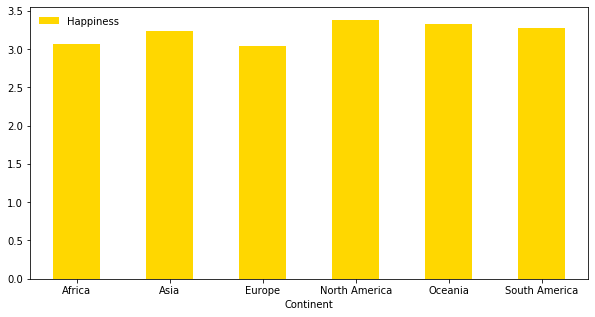

In [8]:
dfcontinent = pd.pivot_table(df, values='V10a', index=['Continent'], aggfunc='mean')
dfcontinent.plot.bar(rot=0,figsize=(10,5), color =['gold']).legend(['Happiness'], loc = 2, frameon=False);

From the bar chart, we can see that North America has the highest happiness score and Europe has the lowest happiness score.

Next, I compared the happiness by continent and gender to see if there is a difference from the overall happiness score by continent. 

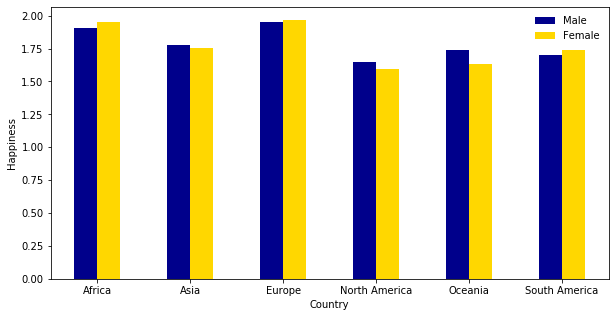

In [9]:
c = (df['V240a'] == 1) | (df['V240a'] == 2)
dfgendercontraw = df[c]

dfgendercont = pd.pivot_table(dfgendercontraw, values = ['V10a'], index = ['Continent'], columns=['V240a'], aggfunc = np.mean)
dfgendercont['V10a'] = dfgendercont['V10a'].apply(lambda x : 5 - x )

dfgendercont.plot.bar(rot=0, color=['darkblue','gold'],figsize=(10,5))
plt.ylabel('Happiness')
plt.xlabel('Country')
plt.legend(['Male', 'Female'], loc=0, frameon = False);

In Africa, Europe, and South Amercia, males have higher happiness score compared to females. In Asia, North America, and Oceania, females have higher happiness score compared to males. The highest and lowest rank didn't change.

I browsed the data to find out the top 10 countries with the highest happiness score and top 10 countries with the lowest happiness score.

In [10]:
dfranking = pd.pivot_table(df, values='V10a', index=['V2'], aggfunc='mean').sort_values(by='V10a', ascending=False).reset_index()
dfranking.columns = ['Country','Happiness']
print(dfranking.head(10))
print(dfranking.tail(10))

               Country  Happiness
0           Uzbekistan   3.618000
1               Mexico   3.613000
2                Qatar   3.541509
3             Malaysia   3.526154
4              Ecuador   3.500000
5             Colombia   3.477513
6  Trinidad and Tobago   3.412412
7          Philippines   3.385833
8               Sweden   3.373134
9               Kuwait   3.349962
      Country  Happiness
50    Ukraine   2.941333
51    Tunisia   2.919502
52    Estonia   2.902153
53    Belarus   2.885342
54      Yemen   2.865000
55    Georgia   2.861897
56  Palestine   2.804000
57    Romania   2.781770
58       Iraq   2.765000
59      Egypt   1.939593


Top 10 countries with the highest happiness scores are Uzbekistan, Mexico, Qatar, Malaysia, Ecuador, Colombia, Trinidad and Tobago, Philippines, Sweden, and Kuwait. The countries with the lowest scores are Egypt, Iraq, Romania, Palestine, Georgia, Yemen, Belarus, Estonia, Tunisia, and Ukraine.
<br>
<br>
Below is the bar chart of happiness score rankings by country.

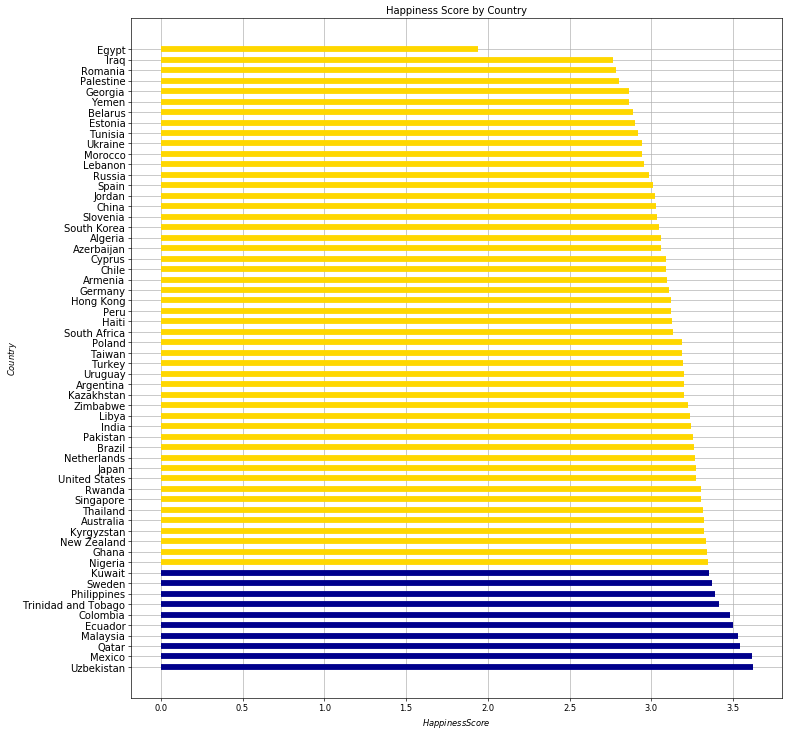

In [27]:
dfranking.sort_values(by='Happiness', ascending=False).reset_index()

colorrule = np.where(dfranking.index<10, 'darkblue', 'gold')
plt.figure(figsize=(14,15), dpi= 60)
plt.hlines(y=dfranking.index, xmin=0, xmax=dfranking.Happiness, alpha=1, linewidth=7, color=colorrule)

plt.gca().set(ylabel='$Country$', xlabel='$Happiness Score$')

plt.yticks(dfranking.index, dfranking.Country, fontsize=12)
plt.title('Happiness Score by Country', fontdict={'size':12})
plt.grid()
plt.show()

To go further, I split the data by gender and see if there is a difference in ranking by gender.

In [12]:
dfranking2 = pd.pivot_table(dfgendercontraw, values='V10a', index=['V2'], columns=['V240a'], aggfunc='mean').reset_index()
dfranking2.columns = ['Country','Male','Female']

print(dfranking2[['Country','Male']].sort_values(by='Male', ascending=False).head(10))
print(dfranking2[['Country','Male']].sort_values(by='Male', ascending=False).tail(10))

print(dfranking2[['Country','Female']].sort_values(by='Female', ascending=False).head(10))
print(dfranking2[['Country','Female']].sort_values(by='Female', ascending=False).tail(10))

        Country      Male
57   Uzbekistan  3.623064
29       Mexico  3.594595
39        Qatar  3.586066
28     Malaysia  3.514970
11      Ecuador  3.513746
9      Colombia  3.478667
24       Kuwait  3.415730
37  Philippines  3.360000
33      Nigeria  3.353604
50     Thailand  3.349180
      Country      Male
30    Morocco  2.924497
5     Belarus  2.924198
52    Tunisia  2.908517
13    Estonia  2.887427
58      Yemen  2.805221
14    Georgia  2.801085
40    Romania  2.788491
35  Palestine  2.762295
20       Iraq  2.747218
12      Egypt  1.840816
                Country    Female
29               Mexico  3.631369
57           Uzbekistan  3.614799
28             Malaysia  3.537975
39                Qatar  3.503497
11              Ecuador  3.487097
9              Colombia  3.476378
51  Trinidad and Tobago  3.474453
48               Sweden  3.419152
37          Philippines  3.411667
32          New Zealand  3.404564
      Country    Female
54    Ukraine  2.925556
58      Yemen  2.924303
26  

#### Male
Top 10 countries with the highest happiness scores are Uzbekistan, Mexico, Qatar, Malaysia, Ecuador, Colombia, Kuwait, Philippines, Nigeria, and Thailand. The countries with the lowest scores are Egypt, Iraq, Palestine, Romania, Georgia, Yemen, Estonia, Tunisia, Belarus, and Morocco.
<br>
#### Female
Top 10 countries with the highest happiness scores are Mexico, Uzbekistan, Malaysia, Qatar, Ecuador, Colombia, Trinidad and Tobago, Sweden, Philippines, and New Zealand. The countries with the lowest scores are Egypt, Romaina, Iraq, Palestine, Belarus, Georgia, Estonia, Lebanon, Yemen, and Ukraine.
<br>
Below is the bar chart of happiness score rankings by country.

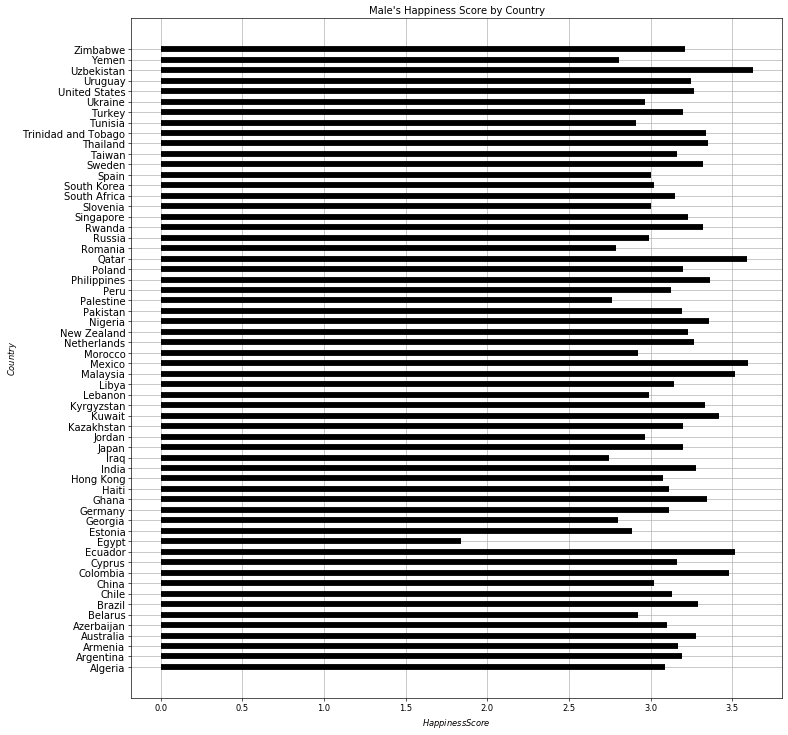

In [39]:
dfranking2.sort_values(by='Male', ascending=False).reset_index()
plt.figure(figsize=(14,15), dpi= 60)
plt.hlines(y=dfranking2.Country, xmin=0, xmax=dfranking2.Male, alpha=1, linewidth=7)

plt.gca().set(ylabel='$Country$', xlabel='$Happiness Score$')
plt.yticks(dfranking2.index, dfranking2.Country, fontsize=12)
plt.title('Male\'s Happiness Score by Country', fontdict={'size':12})
plt.grid()
plt.show()

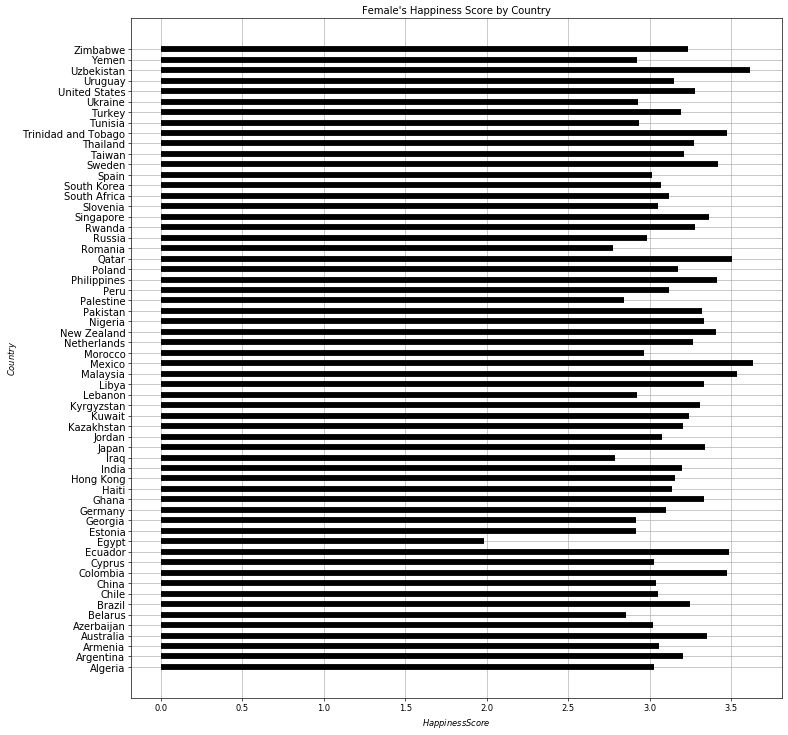

In [40]:
dfranking2.sort_values(by='Female', ascending=False).reset_index()
plt.figure(figsize=(14,15), dpi= 60)
plt.hlines(y=dfranking2.index, xmin=0, xmax=dfranking2.Female, alpha=1, linewidth=7)

plt.gca().set(ylabel='$Country$', xlabel='$Happiness Score$')
plt.yticks(dfranking2.index, dfranking2.Country, fontsize=12)
plt.title('Female\'s Happiness Score by Country', fontdict={'size':12})
plt.grid()
plt.show()

I added GDP data to see if happiness score differ by GDP.

In [15]:
gdpdfraw = pd.read_csv('GDP_20102013.csv')
gdpdfraw['AverageGDP'] = (gdpdfraw['2010'] + gdpdfraw['2011'] + gdpdfraw['2012'] + gdpdfraw['2013'])/4 
df['GDP'] = df['V2'].map(gdpdfraw.set_index('Country Name')['AverageGDP'])

In [16]:
dfgdp = pd.pivot_table(df, values='V10a', index=['V2', 'GDP'], aggfunc='mean').reset_index()
dfgdp.columns = ['Country','GDP','Happiness']
print(dfgdp.sort_values(by='GDP', ascending=False).head(10))
print(dfgdp.sort_values(by='GDP', ascending=False).tail(10))


          Country           GDP  Happiness
49  United States  1.587500e+13   3.272401
8           China  7.935000e+12   3.030435
19          Japan  5.805000e+12   3.271797
14        Germany  3.617500e+12   3.107038
6          Brazil  2.442500e+12   3.261777
17          India  1.797500e+12   3.243992
3       Australia  1.420000e+12   3.318213
42          Spain  1.405000e+12   3.007569
41    South Korea  1.205000e+12   3.045000
26         Mexico  1.177500e+12   3.613000
                Country           GDP  Happiness
23              Lebanon  4.239815e+10   2.955833
20               Jordan  3.003138e+10   3.020000
10               Cyprus  2.552880e+10   3.089000
45  Trinidad and Tobago  2.511764e+10   3.412412
12              Estonia  2.271055e+10   2.902153
52             Zimbabwe  1.558736e+10   3.223333
13              Georgia  1.451489e+10   2.861897
2               Armenia  1.028580e+10   3.096364
16                Haiti  7.620525e+09   3.125752
37               Rwanda  6.825829e+09

When sorted by GDP, top 10 countries were United States, China, Japan, Germany, Brazil, India, Austrailia, Spain, South Korea, and Mexico.
<br>
Lowest 10 countries are Rwanda, Haiti, Armenia, Georgia, Zimbabwe, Estonia, Trinidad and Tobago, Cyprus, Jordan, and Lebanon.

To compare the happiness scores by GDP, I set up a GDP bin for visualization. Countries with rank 11-20 and 21-30 have the highest happiness scores. 10 countries with highest GDP followed next, and the countries with the lowest ranks had the lowest happiness score.

gdpbins
Rank1-10     3.17
Rank11-20    3.29
Rank21-30    3.29
Rank31-40    3.14
Rank41-50    3.14
Rank51-60    3.11
Name: Happiness, dtype: float64


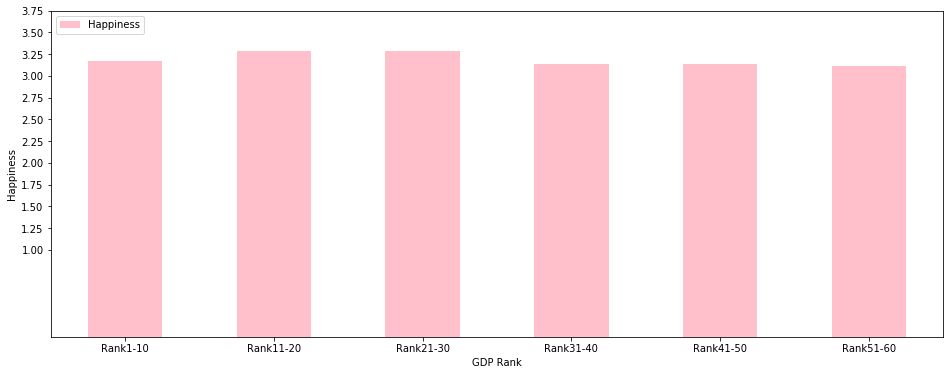

In [17]:
labels = ['Rank51-60','Rank41-50','Rank31-40','Rank21-30','Rank11-20','Rank1-10']
dfgdp['gdpbins'] = pd.qcut(dfgdp['GDP'],q=6, labels=labels).astype(str)

dfgdp2 = dfgdp.groupby(['gdpbins'])['Happiness'].mean().round(2)

ax = dfgdp2.plot.bar(rot=0, color=['pink'])
plt.ylabel('Happiness')
plt.xlabel('GDP Rank')
plt.yticks(np.arange(1, 4, 0.25))
plt.legend(loc=2);
plt.gcf().set_size_inches(16, 6)

print(dfgdp2)


South Korea's average happiness score is 3.045 which is lower than the world average score 3.154 and the rank is 43.

In [18]:
dfranking['Happiness'].mean()

3.154004823365299

In [19]:
dfranking['rankall']=dfranking['Happiness'].rank(ascending=False)
dfranking['rank%']=dfranking['Happiness'].rank(pct=True, ascending=False).round(2)
dfranking[dfranking['Country']=='South Korea']


,Country,Happiness,rankall,rank%
42,South Korea,3.045,43.0,0.72


South Korea's male had an average happiness score of 3.018. The score is slightly lower than that of Female which is 3.07. Male rank 17 and female rank 22. We can infer from this data that although South Korean female rank is lower, female have higher happiness score.

In [20]:
dfranking2['rankmale']=dfranking2['Male'].rank(ascending=False)
dfranking2['rankmale%']=dfranking2['Male'].rank(pct=True, ascending=False).round(2)
dfranking2['rankfemale']=dfranking2['Female'].rank(ascending=False)
dfranking2['rankfemale%']=dfranking2['Female'].rank(pct=True, ascending=False).round(2)
dfranking2[dfranking2['Country']=='South Korea']

,Country,Male,Female,rankmale,rankmale%,rankfemale,rankfemale%
46,South Korea,3.018581,3.070724,44.0,0.73,39.0,0.65


Here are the plots to show the relationship between happiness and other variables based on mean value for each country. On average, people with good state of health, satisfied with one's life freedome of choice and control over life, and satisfied with the financial situation are tend to have a high happiness score.

[Text(0, 0.5, 'Satisfaction with Financial Situation'),
 Text(0.5, 0, 'Happiness Score')]

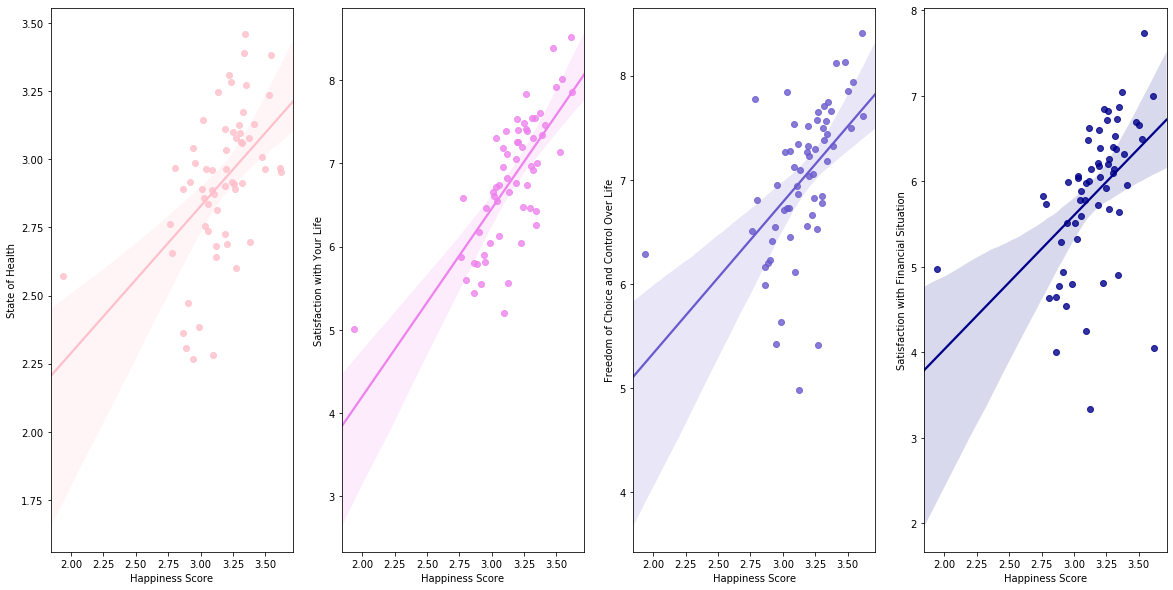

In [21]:
df5variables = df.groupby(['V2'])['V10a', 'V11a','V23a','V55a','V59a'].mean()
fig, axs = plt.subplots(ncols=4, figsize = (20,10))
sns.regplot(x='V10a',y='V11a',data=df5variables, fit_reg=True, color = 'pink', ax=axs[0]).set(xlabel='Happiness Score', ylabel='State of Health')
sns.regplot(x='V10a',y='V23a',data=df5variables, fit_reg=True, color = 'violet', ax=axs[1]).set(xlabel='Happiness Score', ylabel='Satisfaction with Your Life')
sns.regplot(x='V10a',y='V55a',data=df5variables, fit_reg=True, color = 'slateblue', ax=axs[2]).set(xlabel='Happiness Score', ylabel='Freedom of Choice and Control Over Life')
sns.regplot(x='V10a',y='V59a',data=df5variables, fit_reg=True, color = 'darkblue', ax=axs[3]).set(xlabel='Happiness Score', ylabel='Satisfaction with Financial Situation') 

I will move to comparing 'State of Health','Satisfaction with Your Life','Freedom of Choice and Control Over Life','Satisfcation with Financial Situation' scores of South Korea and the top ten countries with the highest happiness score.<br>
First, I will calculate and plot the average scores of each variable for each countries in the top ten group.

In [22]:
topten = ['Uzbekistan', 'Mexico', 'Qatar', 'Malaysia', 'Ecuador', 'Colombia', 'Trinidad and Tobago', 'Philippines', 'Sweden', 'Kuwait']

dftopten = df[df.V2.isin(topten)]

dftoptentable = dftopten.groupby(['V2'])['V10a','V11a','V23a','V55a','V59a'].mean()
dftoptentable = dftoptentable.rename(columns={'V10a': 'Happiness', 'V11a': 'Health', 'V23a':'Life Satisfaction','V55a':'Freedom Life','V59a':'Financial'})
dftoptentable

,Happiness,Health,Life Satisfaction,Freedom Life,Financial
V2,,,,,
Colombia,3.477513,3.006614,8.388228,8.132937,6.692460
Ecuador,3.500000,2.962562,7.918469,7.848586,6.661398
Kuwait,3.349962,3.273216,7.004605,7.750576,6.865695
Malaysia,3.526154,3.236154,7.133846,7.500769,6.491538
Mexico,3.613000,2.967500,8.512500,8.404000,6.996000
Philippines,3.385833,2.695833,7.335000,7.321667,6.325000
Qatar,3.541509,3.381132,8.005660,7.938679,7.731132
Sweden,3.373134,3.077114,7.607794,7.655887,7.045605
Trinidad and Tobago,3.412412,3.131131,7.458458,8.116116,5.960961


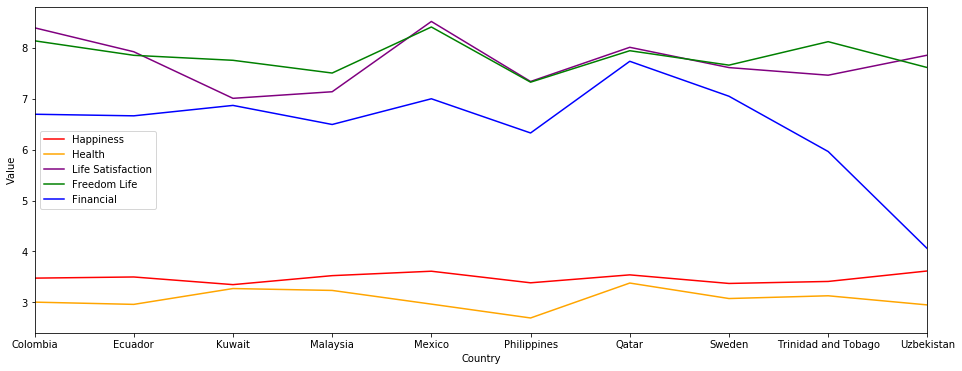

In [23]:
dftoptentable.plot.line(rot=0, color = ['red','orange','purple','green','blue'])
plt.ylabel('Value')
plt.xlabel('Country')
plt.legend(loc=0)
plt.gcf().set_size_inches(16, 6)

It seems like most of the countries in the top ten group has similarities by variables, except for Uzbekistan, where it has the highest happiness score but quite low financial satisfaction score. <br>
Now let's see South Korea's data.

In [24]:
dfKorea = df[df.V2 == 'South Korea']
dfKoreatable = dfKorea.groupby(['V2'])['V10a','V11a','V23a','V55a','V59a'].mean()
dfKoreatable

,V10a,V11a,V23a,V55a,V59a
V2,,,,,
South Korea,3.045,2.963333,6.55,6.728333,5.7825


In [25]:
dftoptentable.mean()

Happiness            3.479752
Health               3.068326
Life Satisfaction    7.721589
Freedom Life         7.827722
Financial            6.482446
dtype: float64

When compared to the mean value of the top ten countries, South Korea is behind in all variables though 'State of Health' score is quite close to the top ten average. <br>
Interestingly, South Korea has higher GDP than any other countries in the group but the financial satisfaction scores are lower than the group.

### 4. Coming Up with a Happiness Formula

Happiness Formula based on 60 countries' average happiness scores.

In [31]:
import statsmodels.api as sm

X = df5variables[["V11a","V23a","V55a","V59a"]]
y = df5variables["V10a"] 
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   V10a   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.634
Method:                 Least Squares   F-statistic:                     26.53
Date:                Sat, 07 Dec 2019   Prob (F-statistic):           2.78e-12
Time:                        00:32:42   Log-Likelihood:                 28.472
No. Observations:                  60   AIC:                            -46.94
Df Residuals:                      55   BIC:                            -36.47
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0531      0.248      4.244      0.000       0.556       1.550
V11a           0.3270      0.088      3.711      0.000       0.150       0.504
V23a           0.3270      0.048      6.743      0.000       0.230       0.424
V55a          -0.0771      0.048     -1.620      0.111      -0.172       0.018
V59a          -0.0915      0.038     -2.434      0.018      -0.167      -0.016
==============================================================================
Omnibus:                       20.059   Durbin-Watson:                   2.189
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               66.085
Skew:                          -0.760   Prob(JB):                     4.47e-15
Kurtosis:                       7.911   Cond. No.                         148.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The Happiness Formula is ... <br>
## E(Happiness) = 1.0531 + 0.3270*(State of Health) + 0.3270*(Satisfaction of Life) - 0.0771(Freedom of Choice and Control Over Life) - 0.0915(Satisfaction with Financial Situation)

Happiness Formula based on top 10 countries' average happiness scores.

In [34]:
import statsmodels.api as sm

X = dftoptentable[["Health","Life Satisfaction","Freedom Life","Financial"]]
y = dftoptentable["Happiness"] 
X = sm.add_constant(X) ## let's add an intercept (beta_0) to our model

# Note the difference in argument order
model = sm.OLS(y, X).fit() ## sm.OLS(output, input)
predictions = model.predict(X)

# Print out the statistics
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              Happiness   R-squared:                       0.659
Model:                            OLS   Adj. R-squared:                  0.386
Method:                 Least Squares   F-statistic:                     2.415
Date:                Sat, 07 Dec 2019   Prob (F-statistic):              0.180
Time:                        00:33:31   Log-Likelihood:                 15.038
No. Observations:                  10   AIC:                            -20.08
Df Residuals:                       5   BIC:                            -18.56
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
=====================================================================================
                        coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------------
const                 2.3647      0.686      3.447      0.018       0.601       4.128
Health                0.2314      0.162      1.428      0.213      -0.185       0.648
Life Satisfaction     0.1944      0.082      2.368      0.064      -0.017       0.406
Freedom Life         -0.0996      0.127     -0.786      0.468      -0.426       0.226
Financial            -0.0488      0.029     -1.666      0.157      -0.124       0.027
==============================================================================
Omnibus:                        0.238   Durbin-Watson:                   1.384
Prob(Omnibus):                  0.888   Jarque-Bera (JB):                0.357
Skew:                           0.265   Prob(JB):                        0.836
Kurtosis:                       2.240   Cond. No.                         379.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### The Happiness Formula of the top countries is ... <br>
## E(Happiness) = 2.3647 + 0.2314*(State of Health) + 0.1944*(Satisfaction of Life) - 0.0996(Freedom of Choice and Control Over Life) - 0.0488(Satisfaction with Financial Situation) <br>
This model explains 65.9% of the case. There are limitations as the model is based on average scores of each country. Also there is a non significant value within the formula.